# **Analiza nogometašev Premier lige v letu 2022/23**

## Uvod
Za projekt bom analizirala podatke o nogometaših Angleške Premier lige. Podatke sem pridobila s spletne strani https://www.premierleague.com/players.
Premier liga je največja profesionalna nogometna liga v Angliji in ena najbolj priljubljenih ter konkurenčnih nogometnih lig na svetu. Ustanovljena je bila leta 1992 in je nadomestila staro Prvo divizijo kot najvišjo raven angleškega nogometa.
Vključuje 20 ekip:
* Arsenal
* Aston Villa
* Bournemouth
* Brentford
* Brighton & Hove Albion
* Burnley
* Chelsea
* Crystal Palace
* Everton
* Fulham
* Liverpool
* Luton Town
* Manchester City
* Manchester United
* Newcastle United
* Nottingham Forest
* Sheffield United
* Tottenham Hotspur
* West Ham United
* Wolverhampton Wanderers (Wolves)

Po podatkih naj bi bilo vseh igralcev v ligi sezone 2022/23 skupaj 569. Za vsakega sem zbrala naslednje podatke:

* Ime
* Nacionalnost
* Položaj na igrišču
* Klub, s katerim je povezan
* Leto rojstva
* Starost v letu 2022/23
* Skupno število nastopov
* Skupen čas igranja
* Skupno število doseženih golov
* Skupno število asistenc
* Pričakovano število golov
* Število rumenih kartonov
* Število rdečih kartonov


In [245]:
import pandas as pd
fuzbalercki = pd.read_csv('statistika_igralcev.csv')
pd.set_option("display.max_rows", 30)


## Razpredelnica vseh igralcev po priimkih

In [246]:
fuzbalercki

,Igralec,Nacionalnost,Pozicija,Klub,Leto rojstva,Starost,Igre,Čas igranja v min,Goli,Asistence,Pričakovani goli,Rumeni kartoni,Rdeči kartoni
0,Brenden Aaronson,USA,"MF,FW",Leeds United,2000,21,36,"2,372",1,3,3.9,2,0
1,George Abbott,ENG,MF,Tottenham,2005,16,1,1,0,0,0.0,0,0
2,Che Adams,SCO,FW,Southampton,1996,26,28,"1,992",5,3,6.7,1,0
3,Tyler Adams,USA,MF,Leeds United,1999,23,24,"2,156",0,0,0.1,6,1
4,Tosin Adarabioyo,ENG,DF,Fulham,1997,24,25,"2,085",1,0,0.7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,Jordan Zemura,ZIM,DF,Bournemouth,1999,22,19,"1,454",0,1,0.4,1,0
566,Oleksandr Zinchenko,UKR,DF,Arsenal,1996,25,27,"2,118",1,2,1.4,3,0
567,Hakim Ziyech,MAR,"FW,MF",Chelsea,1993,29,18,661,0,3,0.6,1,0
568,Kurt Zouma,FRA,DF,West Ham,1994,27,25,"1,989",2,0,2.2,0,0


## Pozicije
Preden se poglobimo v analizo, bom razložila osnovne pozicije v nogometu in njihove kratice, s katerimi bodo označene pozicije v grafih:

* **GK** (*Goalkeeper*) ali Vratar: Zadnja obrambna linija ekipe, edini igralec, ki lahko igra z rokami znotraj svojega kazenskega prostora.
* **DF** (*Defender*) ali Branilec: Igralci, ki so primarno odgovorni za preprečevanje napadov nasprotne ekipe. Delijo se na srednje branilce ter leve in desne bočne branilce
* **MF** (*Midfielder*) ali Vezni igralec: Povezujejo obrambo in napad, sodelujejo pri obeh fazah igre. Tudi te se delijo še na različne podvloge (centralni vezist, obrambni vezist, napadalni vezist, levi/desni vezist)
* **FW** (*Forward*) ali Napadalec: Glavni strelci ekipe, odgovorni za doseganje golov. Vključujejo Centralne napadalce in Levo/Desno krilo


Pa si poglejmo tortni diagram, ki prikazuje porazdelitev igralcev po teh pozicijah. Tortni diagram bo posebaj prikazal tudi igralce, izurjene za več pozicij.

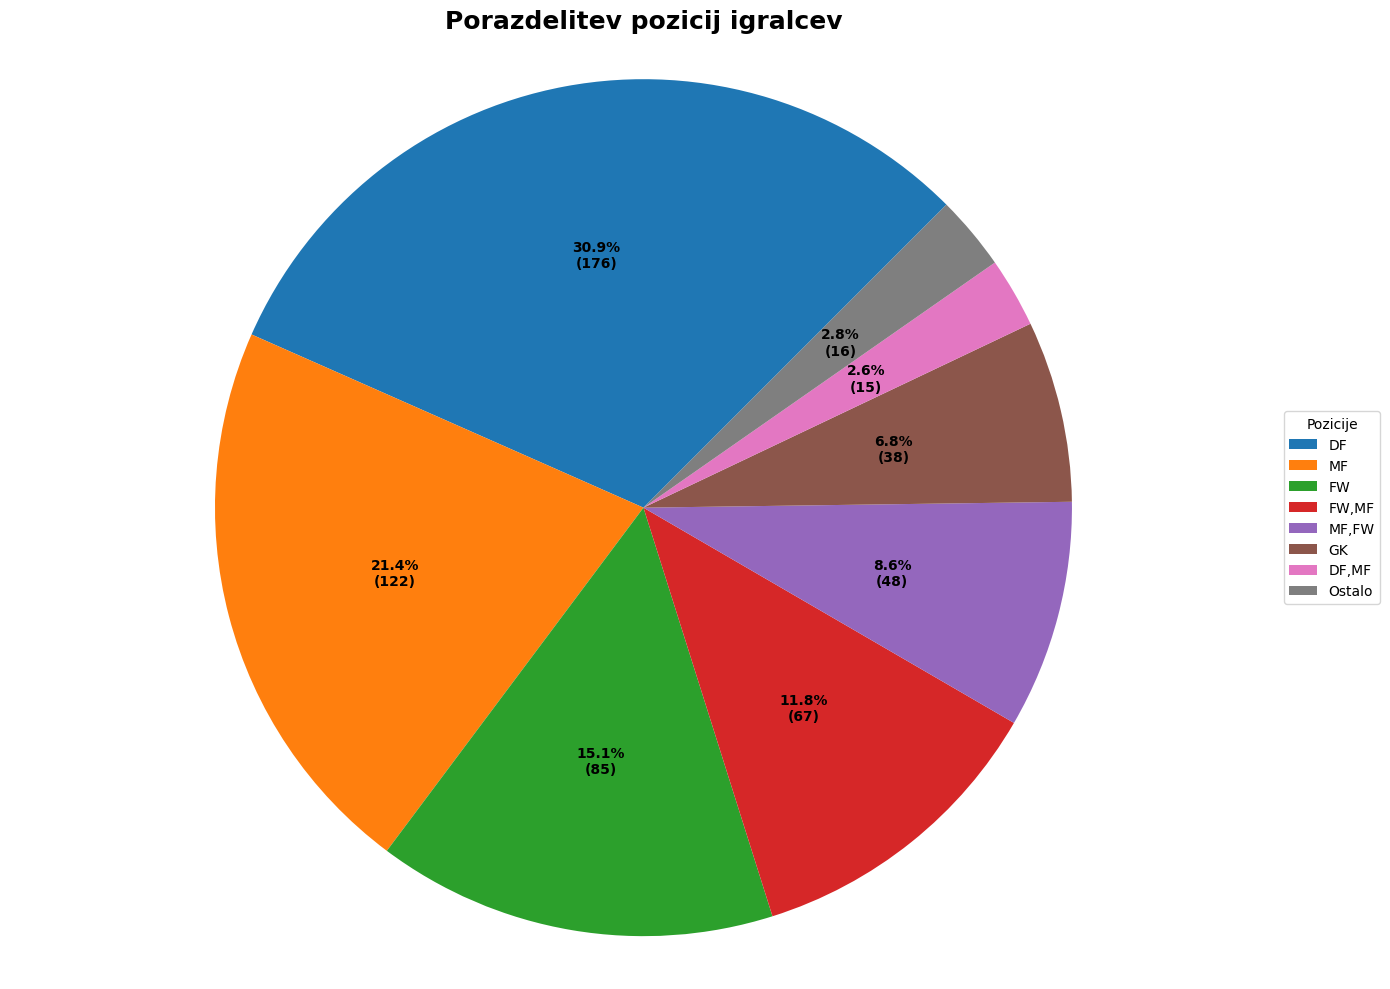

In [247]:
import matplotlib.pyplot as plt

stevilo_po_pozicijah = fuzbalercki['Pozicija'].value_counts()

razvrstene_pozicije = stevilo_po_pozicijah.nlargest(7)
ostale_pozicije = stevilo_po_pozicijah.sum() - razvrstene_pozicije.sum()
razvrstene_pozicije['Ostalo'] = ostale_pozicije

slika, os = plt.subplots(figsize=(14, 10))
kosi, besedila, avtobesedila = os.pie(razvrstene_pozicije.values, 
                                      autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(razvrstene_pozicije))})',
                                      textprops=dict(color="black", fontweight='bold'),
                                      startangle=45)

# leegnda
os.legend(kosi, razvrstene_pozicije.index,
          title="Pozicije",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

os.axis('equal')
plt.title("Porazdelitev pozicij igralcev", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()


## Prvih 20 igralcev glede na število doseženih golov

In [248]:
top_strelci = fuzbalercki.sort_values('Goli', ascending=False).head(20)
top_strelci.reset_index(drop=True)[['Igralec', 'Pozicija', 'Goli', 'Asistence', 'Pričakovani goli']]

,Igralec,Pozicija,Goli,Asistence,Pričakovani goli
0,Erling Haaland,FW,36,8,28.4
1,Harry Kane,FW,30,3,21.4
2,Ivan Toney,FW,20,4,18.7
3,Mohamed Salah,FW,19,12,21.6
4,Callum Wilson,FW,18,5,17.4
5,Marcus Rashford,FW,17,5,15.4
6,Gabriel Martinelli,FW,15,5,9.1
7,Ollie Watkins,FW,15,6,16.5
8,Martin Ødegaard,MF,15,7,10.0
9,Bukayo Saka,FW,14,11,11.2


## Sestava lige po nacionalnosti
Poglejmo koliko igralcev je "domačih", torej iz Anglije in koliko tujih.

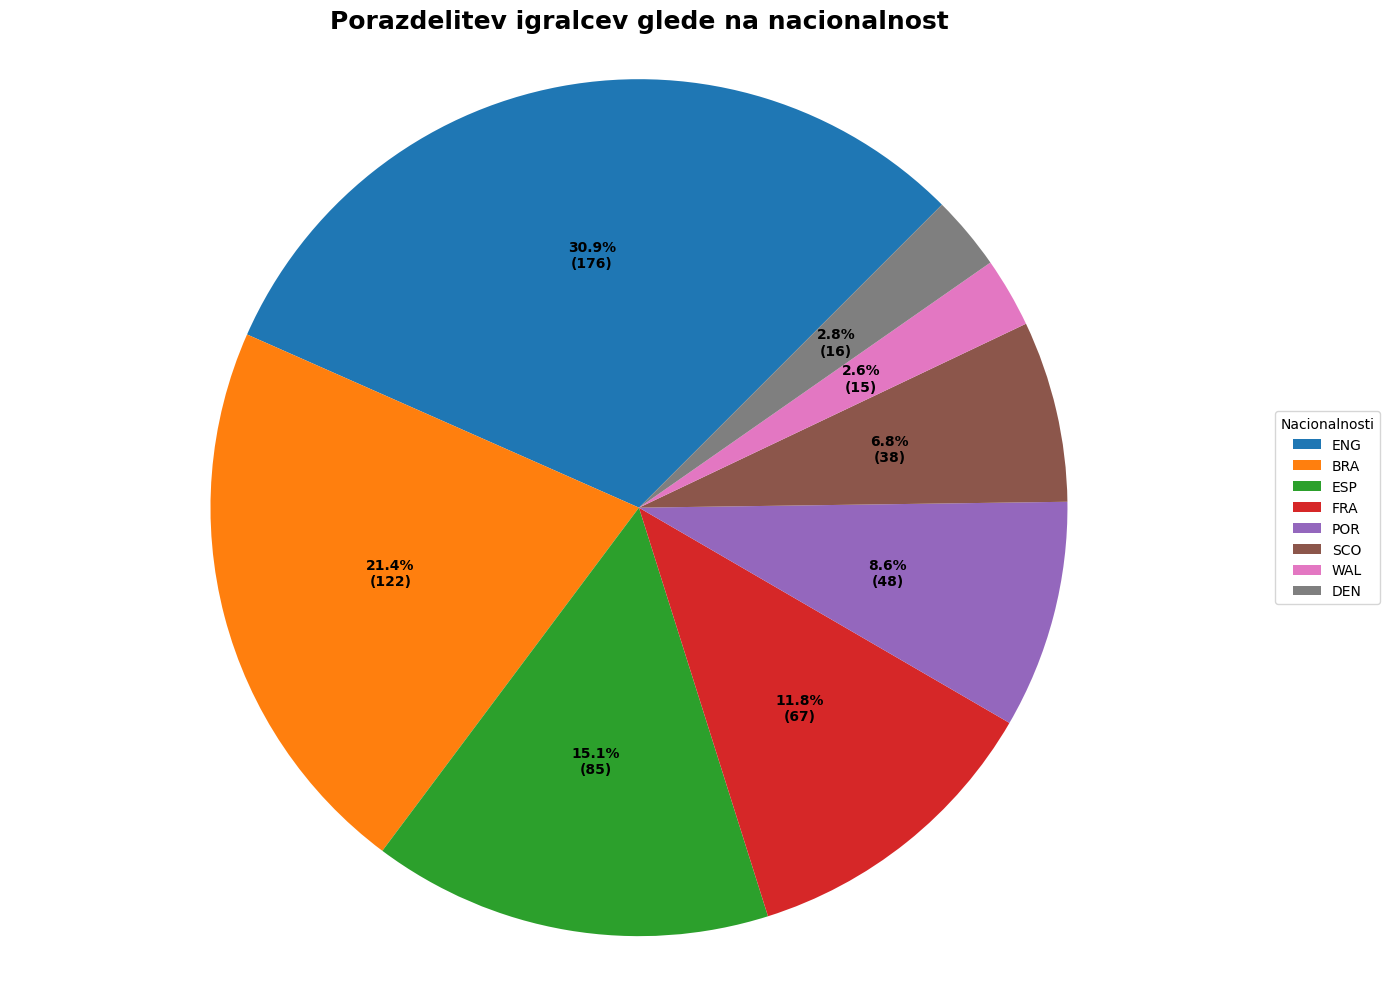

In [249]:

nacionalnost = fuzbalercki['Nacionalnost'].value_counts()

razvrstene_nacionalnosti = nacionalnost.nlargest(20)
ostale_nac = nacionalnost.sum() - razvrstene_nacionalnosti.sum()
razvrstene_nacionalnosti['Ostalo'] = ostale_nac

slika, os = plt.subplots(figsize=(14, 10))
kosi, besedila, avtobesedila = os.pie(razvrstene_pozicije.values, 
                                      autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(razvrstene_pozicije))})',
                                      textprops=dict(color="black", fontweight='bold'),
                                      startangle=45)

# leegnda
os.legend(kosi, razvrstene_nacionalnosti.index,
          title="Nacionalnosti",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

os.axis('equal')
plt.title("Porazdelitev igralcev glede na nacionalnost", fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

## Starost igralcev
Za začetek si lahko ogledamo število doseženih golov v odvisnosti od starosti.


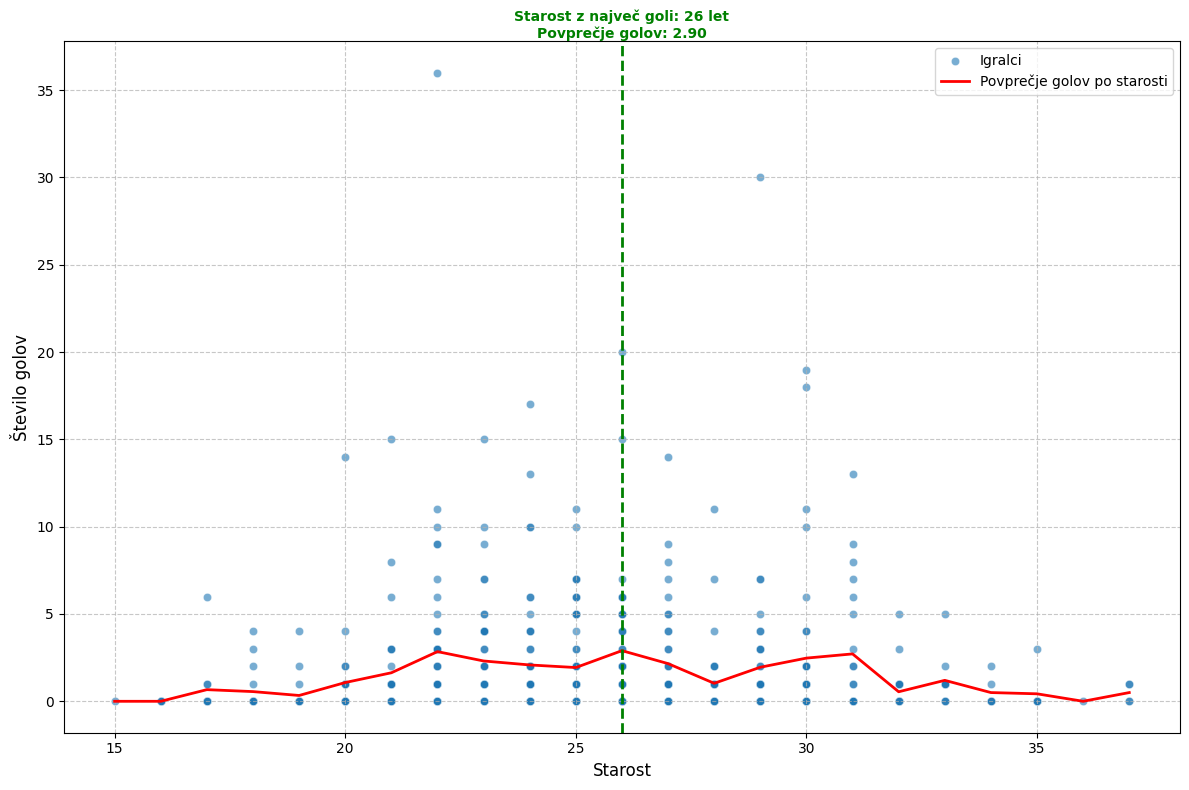

In [250]:
import seaborn as sns

# povprečno št golov za vsako starost
goli = fuzbalercki.groupby('Starost')['Goli'].mean().reset_index()

starost_z_najvec_goli = goli.loc[goli['Goli'].idxmax(), 'Starost']
najvec_golov = goli['Goli'].max()

plt.figure(figsize=(12, 8))
sns.scatterplot(data=fuzbalercki, x='Starost', y='Goli', alpha=0.6)

# rdeca črta povprečja
sns.lineplot(data=goli, x='Starost', y='Goli', color='red', linewidth=2)

# starost z največ goli
plt.axvline(x=starost_z_najvec_goli, color='green', linestyle='--', linewidth=2)

plt.xlabel('Starost', fontsize=12)
plt.ylabel('Število golov', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.legend(['Igralci', 'Povprečje golov po starosti'], loc='upper right')


plt.text(starost_z_najvec_goli, plt.gca().get_ylim()[1], 
         f'Starost z največ goli: {starost_z_najvec_goli} let\nPovprečje golov: {najvec_golov:.2f}', 
         horizontalalignment='center', verticalalignment='bottom', color='green', fontweight='bold')

plt.tight_layout()

plt.show()



Vidimo torej, da v povprečju največ golov zadevajo 26-letniki. Prav tako pa je razvidno tudi, da je največ golov dal 21-letnik.

Poglejmo si sedaj še povprečno starost igralcev v posameznem klubu

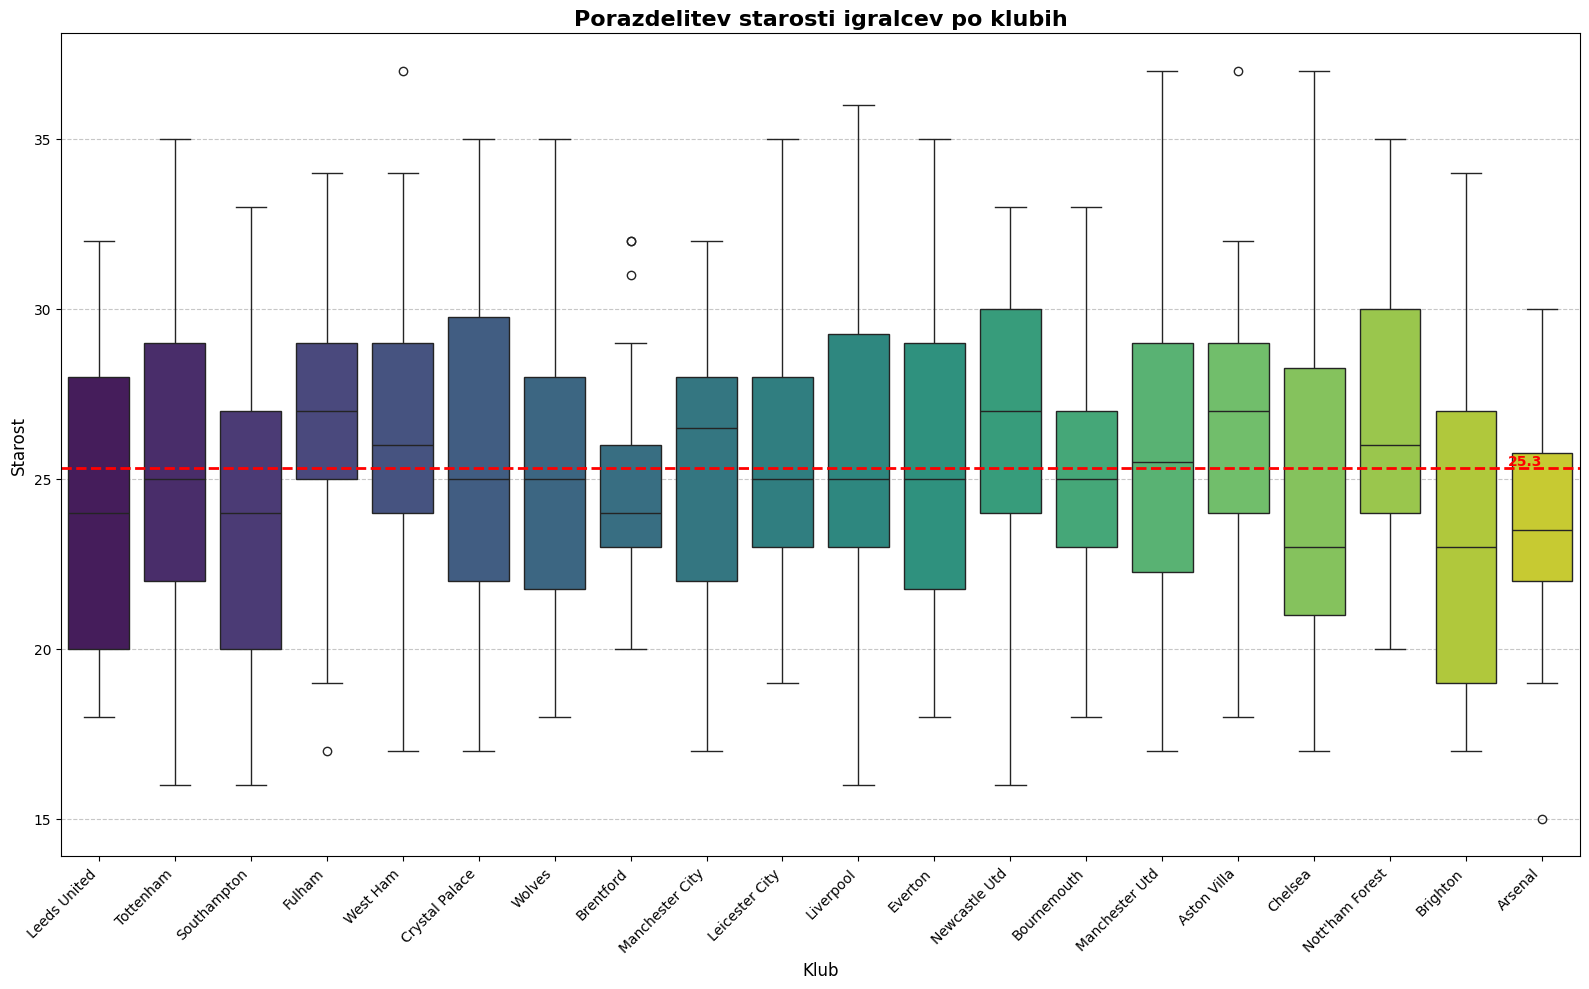

In [251]:

plt.figure(figsize=(16, 10))

sns.boxplot(x='Klub', y='Starost', data=fuzbalercki, hue='Klub', legend=False, palette='viridis')# ta hue in legend mi je terminal tezil zato sem dala

plt.title('Porazdelitev starosti igralcev po klubih', fontsize=16, fontweight='bold')
plt.xlabel('Klub', fontsize=12)
plt.ylabel('Starost', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

# povprečna starost
povprecje_lige = fuzbalercki['Starost'].mean()
plt.axhline(y=povprecje_lige, color='r', linestyle='--', linewidth=2)
plt.text(len(fuzbalercki['Klub'].unique())-1, povprecje_lige, f'{povprecje_lige:.1f}', 
         va='bottom', ha='right', color='r', fontweight='bold')


plt.tight_layout()
plt.show()


Kot razvidno so v klubih, kot sta npr. Fullham in Newcastle igralci starejši od povprečja. V Brentfordu in Arsenalu pa so podpovprečno stari. V slednjem klubu vidimo tudi, da imajo igralca z najnižjo starostjo — 15 let. Štirje klubi imajo najstarejše igralce. Poglejmo kateri štirje igralci so to...

In [252]:
najstarejsi_igralci = fuzbalercki.sort_values('Starost', ascending=False).head(4)
najstarejsi_igralci.reset_index(drop=True)

,Igralec,Nacionalnost,Pozicija,Klub,Leto rojstva,Starost,Igre,Čas igranja v min,Goli,Asistence,Pričakovani goli,Rumeni kartoni,Rdeči kartoni
0,Ashley Young,ENG,DF,Aston Villa,1985,37,29,"2,036",1,0,0.5,7,0
1,Łukasz Fabiański,POL,GK,West Ham,1985,37,36,"3,111",0,0,0.0,1,0
2,Cristiano Ronaldo,POR,FW,Manchester Utd,1985,37,10,525,1,0,1.9,2,0
3,Thiago Silva,BRA,DF,Chelsea,1984,37,27,"2,352",0,2,1.5,2,0


## Uspeh posameznih klubov
Seveda nas sedaj ko vemo kako so igralci starostno razporejeni po klubih zanima še kako uspešni so klubi.

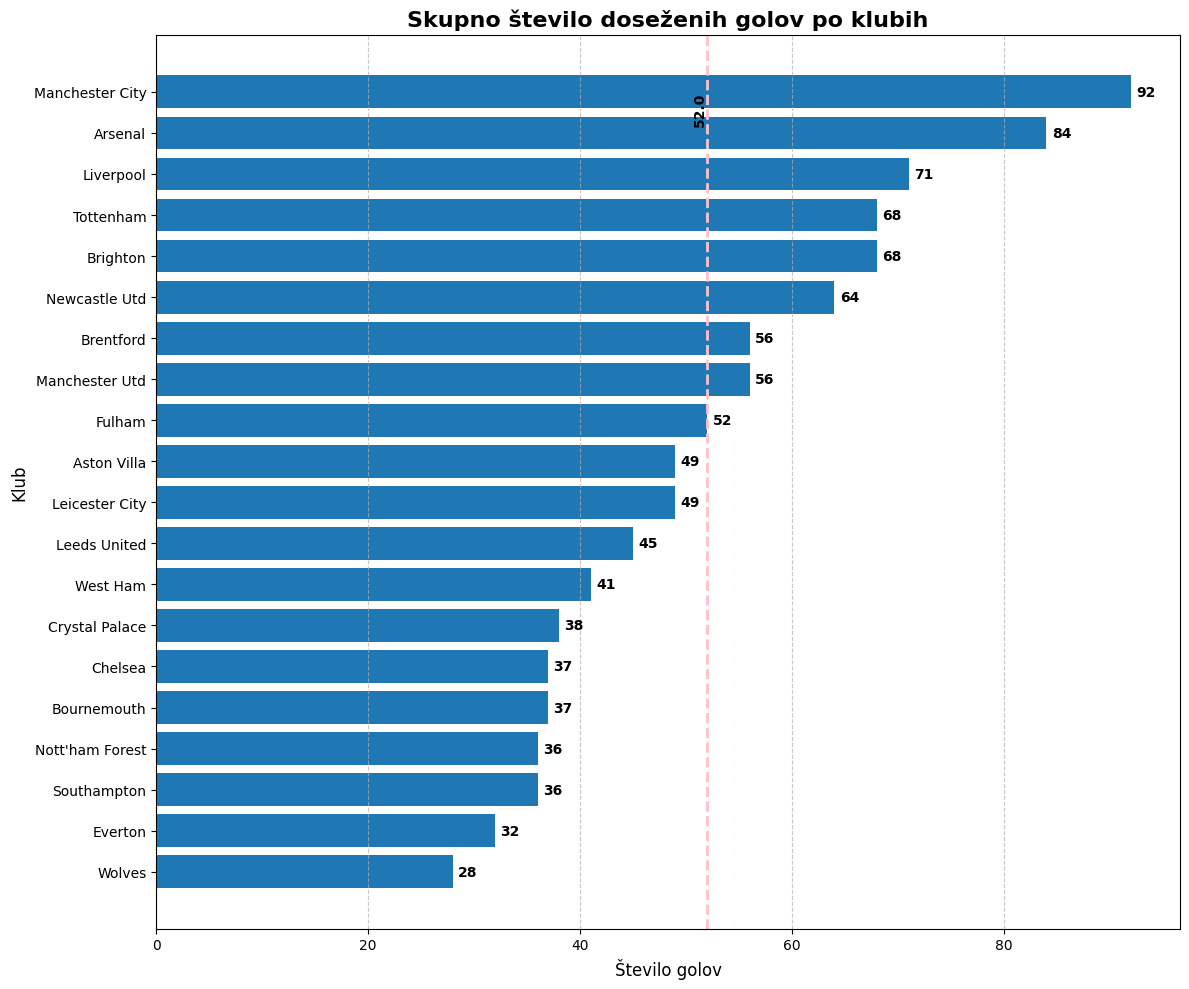

In [253]:


# skupno število golov za vsak klub
goli_po_klubih = fuzbalercki.groupby('Klub')['Goli'].sum().sort_values(ascending=True)

plt.figure(figsize=(12, 10))
bars = plt.barh(goli_po_klubih.index, goli_po_klubih.values)

plt.title('Skupno število doseženih golov po klubih', fontsize=16, fontweight='bold')
plt.xlabel('Število golov', fontsize=12)
plt.ylabel('Klub', fontsize=12)

for i, v in enumerate(goli_po_klubih.values):
    plt.text(v + 0.5, i, str(v), va='center', fontweight='bold')

povprecje_lige = goli_po_klubih.mean()
plt.axvline(x=povprecje_lige, color='pink', linestyle='--', linewidth=2)
plt.text(povprecje_lige, len(goli_po_klubih)-1, f'{povprecje_lige:.1f}', 
         va='top', ha='right', color='black', fontweight='bold', rotation=90)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



## Učinkovitost igralcev
Uporabila bom formulo <sup>zadeti goli</sup>/<sub>število pričakovanih golov</sub>. Če bo razmerje nad 1, pomeni, da je igralec presegel pričakovanja.

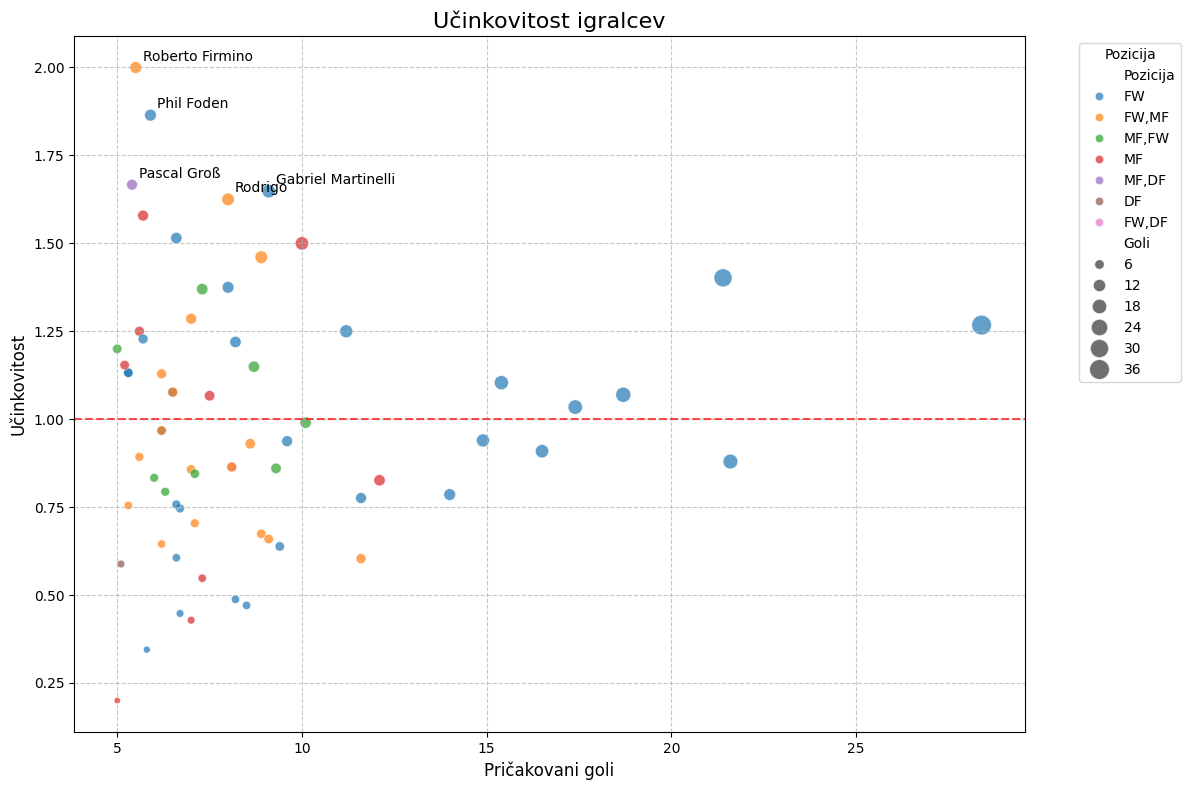

In [254]:
# formula
fuzbalercki['Ucinkovitost'] = fuzbalercki['Goli'] / fuzbalercki['Pričakovani goli']

# ne zelim prevec igralcev, ki imajo slabo napoved, zato filtriram na pricakovanih min 5 golov
min_xg = 5
filter = fuzbalercki[fuzbalercki['Pričakovani goli'] >= min_xg]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=filter, x='Pričakovani goli', y='Ucinkovitost', 
                hue='Pozicija', size='Goli', sizes=(20, 200), alpha=0.7)

plt.axhline(y=1, color='r', linestyle='--', alpha=0.7)

plt.title(f'Učinkovitost igralcev', fontsize=16)
plt.xlabel('Pričakovani goli', fontsize=12)
plt.ylabel('Učinkovitost', fontsize=12)

top_n = 5
top_igralci = filter.nlargest(top_n, 'Ucinkovitost')
for idx, player in top_igralci.iterrows():
    plt.annotate(player['Igralec'], 
                 (player['Pričakovani goli'], player['Ucinkovitost']),
                 xytext=(5, 5), textcoords='offset points')

plt.legend(title='Pozicija', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()


Torej igralec, ki je najbolj presegel pričakovanja je Roberto Firmino, sledi pa mu Phil Foden. Največ pričakovanih golov je okoli 30, kar vidimo po velikosti skrajno desne pike. Igralec je očitno dosegel to pričakovanje s približno 130% učinkovitostjo, torej je zadel okoli 39 golov. Največ golov, pričakovano, pričakujejo od napadalnih igralcev, kar vidimo po barvah pik v bolj desnem delu grafa.

## Zaključek

V tej seminarski nalogi smo se poglobili v analizo podatkov o igralcih Premier lige, pri čemer smo se osredotočili na različne vidike njihove starosti, učinkovitosti in porazdelitve po pozicijah. Naša analiza je razkrila več zanimivih ugotovitev, ki nam omogočajo boljše razumevanje strukture in dinamike ene najprestižnejših nogometnih lig na svetu.

### Ključne ugotovitve:
Analiza je pokazala, da v Premier ligi prevladuje pozicija obrambnega igralca. Veliko je angležev, vendar prevladuje tujcev.
Ugotovili smo tudi, da je povprečna starost igralcev v ligi 26 let, vendar smo potem ugotovili, da starost igralcev ne vpliva preveč na uspešnost kluba. 
Prijetno nas je presenetil Phil Foden. Dosegel je namreč skoraj najboljšo učinkovitost, za kar smo zelo ponosni nanj:)

Te ugotovitve lahko služijo kot eden od virov informacij za trenerje, skavte in vodstva klubov pri načrtovanju transferjev, razvoju mladih igralcev in oblikovanju taktičnih pristopov. Predvsem pa ponujajo navijačem in analitikom globlji vpogled v dinamiko lige.


